# Neural Networks and Deep Learning
### CA1 - Question 2
### Written by Babak Hosseini Mohtasham 810101408 1403/12

**Table of contents**<a id='toc0_'></a>    
- [EDA and preprocessing](#toc1_)    
- [Single layer MLP](#toc2_)    
- [Train with all features](#toc3_)    
- [Tuning the hyperparameters](#toc4_)    
  - [Number of epochs](#toc4_1_)    
  - [Loss function](#toc4_2_)    
  - [Optimizer](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [495]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
np.random.seed(42)

In [496]:
!pip install kaggle

In [ ]:
! kaggle datasets download roqayyeh/concrete-strength-dataset
! unzip concrete-strength-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/roqayyeh/concrete-strength-dataset
License(s): other
concrete-strength-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  concrete-strength-dataset.zip
replace CocreteStrengthEDA.ipynb? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


# <a id='toc1_'></a>[EDA and preprocessing](#toc0_)

In [498]:
df = pd.read_csv('ConcreteStrengthData.csv')
df.sample(2)

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
31,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365,52.91
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90


In [499]:
df.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [500]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            1030 non-null   float64
 1   BlastFurnaceSlag           1030 non-null   float64
 2   FlyAshComponent            1030 non-null   float64
 3   WaterComponent             1030 non-null   float64
 4   SuperplasticizerComponent  1030 non-null   float64
 5   CoarseAggregateComponent   1030 non-null   float64
 6   FineAggregateComponent     1030 non-null   float64
 7   AgeInDays                  1030 non-null   int64  
 8   Strength                   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [501]:
df.duplicated().sum()

25

In [502]:
df.drop_duplicates(inplace=True)

array([[<Axes: title={'center': 'CementComponent '}>,
        <Axes: title={'center': 'BlastFurnaceSlag'}>,
        <Axes: title={'center': 'FlyAshComponent'}>],
       [<Axes: title={'center': 'WaterComponent'}>,
        <Axes: title={'center': 'SuperplasticizerComponent'}>,
        <Axes: title={'center': 'CoarseAggregateComponent'}>],
       [<Axes: title={'center': 'FineAggregateComponent'}>,
        <Axes: title={'center': 'AgeInDays'}>,
        <Axes: title={'center': 'Strength'}>]], dtype=object)

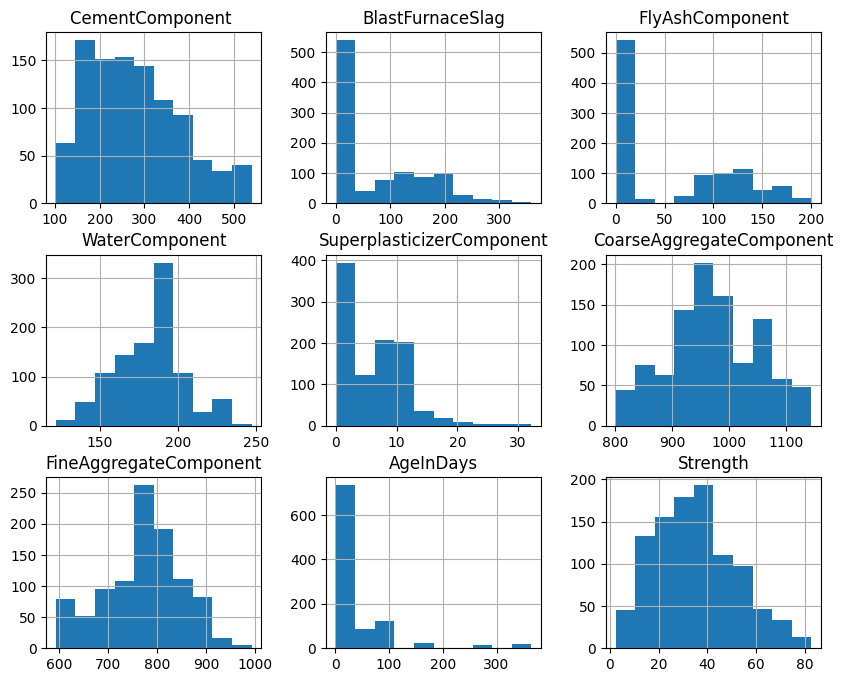

In [503]:
df.hist(figsize=(10,8),bins=10)

<Axes: >

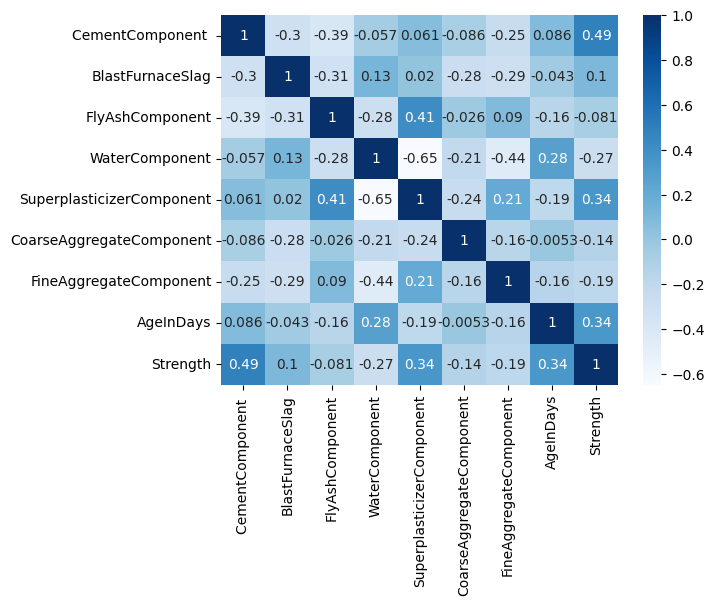

In [504]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)

In [643]:
df.columns

Index(['CementComponent ', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')

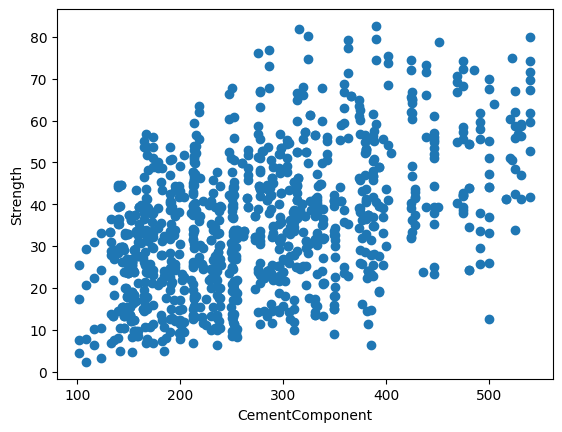

In [656]:
plt.scatter(df['CementComponent '],df['Strength'])
plt.xlabel('CementComponent')
plt.ylabel('Strength')
plt.show()

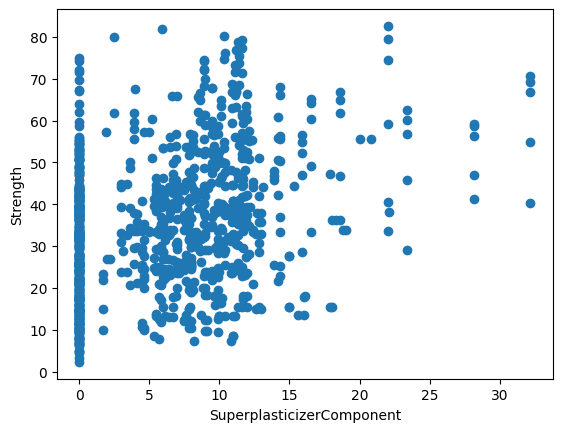

In [655]:
plt.scatter(df['SuperplasticizerComponent'],df['Strength'])
plt.xlabel('SuperplasticizerComponent')
plt.ylabel('Strength')
plt.show()

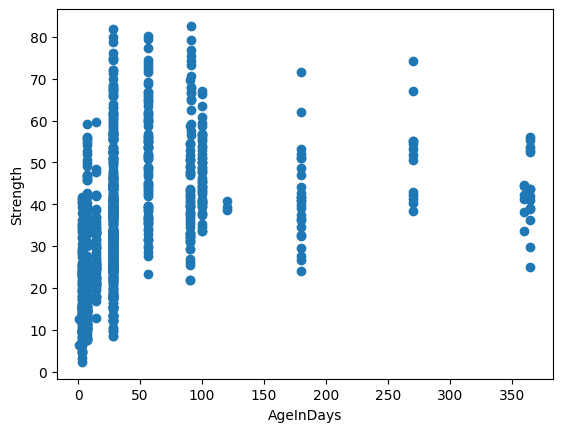

In [654]:
plt.scatter(df['AgeInDays'],df['Strength'])
plt.xlabel('AgeInDays')
plt.ylabel('Strength')
plt.show()

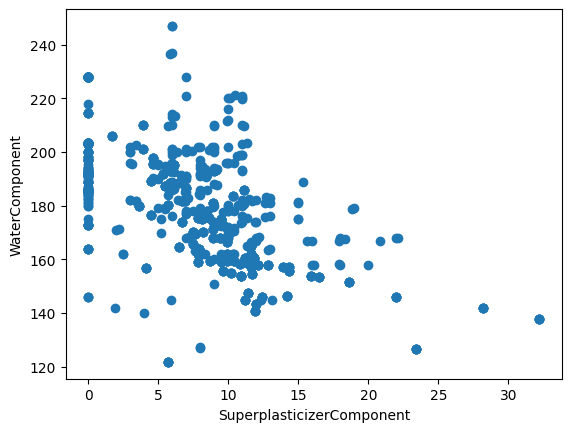

In [653]:
plt.scatter(df['SuperplasticizerComponent'],df['WaterComponent'])
plt.xlabel('SuperplasticizerComponent')
plt.ylabel('WaterComponent')
plt.show()

In [505]:
X_no_drop = df.drop('Strength',axis=1)
y = df['Strength']
X_train_no_drop, X_test_no_drop, y_train, y_test = train_test_split(X_no_drop,y,test_size=0.2, random_state=42)

In [ ]:
X = X_no_drop.drop(columns=['FlyAshComponent','WaterComponent'],inplace=False)
X_train = X_train_no_drop.drop(columns=['FlyAshComponent','WaterComponent'],inplace=False)
X_test = X_test_no_drop.drop(columns=['FlyAshComponent','WaterComponent'],inplace=False)

# <a id='toc2_'></a>[Single layer MLP](#toc0_)

In [507]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
tf.random.set_seed(42)

In [508]:
model1 = Sequential([
    Input(shape = (X.shape[1],)),
    Dense(units=16, activation='relu'),
    Dense(units=1)
])
model2 = Sequential([
    Input(shape = (X.shape[1],)),
    Dense(units=32, activation='relu'),
    Dense(units=1)
])

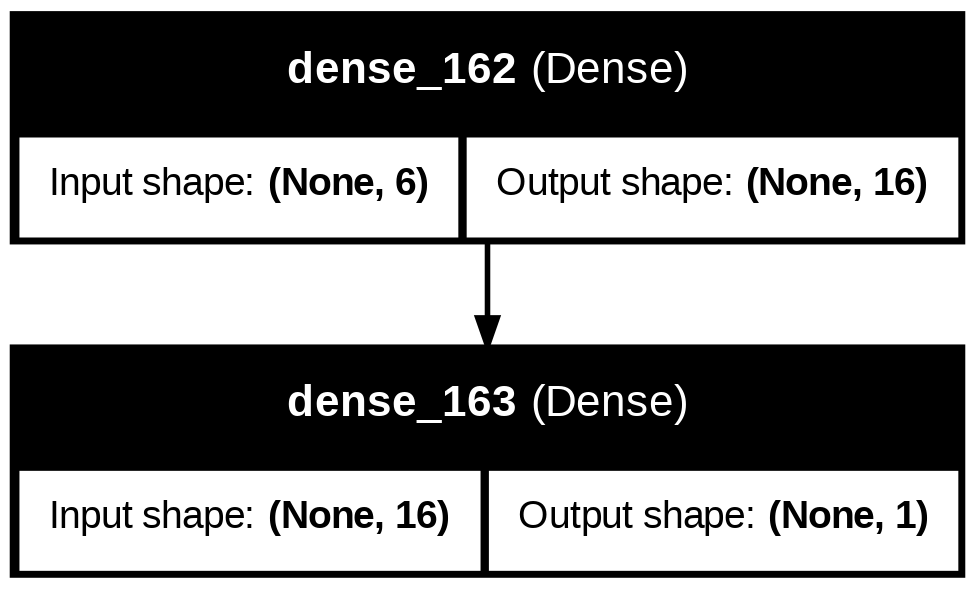

In [509]:
keras.utils.plot_model(model1, show_shapes=True, show_layer_names=True)

In [510]:
model1.compile(optimizer='adam', loss=keras.losses.mse, metrics=['mse','mae'])
hist1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/50
26/26 - 4s - 145ms/step - loss: 28259.5020 - mae: 156.0668 - mse: 28259.5020 - val_loss: 4730.6777 - val_mae: 61.7252 - val_mse: 4730.6777
Epoch 2/50
26/26 - 1s - 47ms/step - loss: 1836.2391 - mae: 33.9013 - mse: 1836.2391 - val_loss: 1633.2034 - val_mae: 31.4032 - val_mse: 1633.2034
Epoch 3/50
26/26 - 1s - 28ms/step - loss: 1061.1467 - mae: 25.2176 - mse: 1061.1467 - val_loss: 1128.7983 - val_mae: 25.6387 - val_mse: 1128.7983
Epoch 4/50
26/26 - 1s - 21ms/step - loss: 854.2477 - mae: 22.7836 - mse: 854.2477 - val_loss: 980.9645 - val_mae: 24.1642 - val_mse: 980.9645
Epoch 5/50
26/26 - 1s - 26ms/step - loss: 744.3217 - mae: 21.5074 - mse: 744.3217 - val_loss: 875.5273 - val_mae: 23.0545 - val_mse: 875.5273
Epoch 6/50
26/26 - 0s - 16ms/step - loss: 660.2958 - mae: 20.5029 - mse: 660.2958 - val_loss: 777.8607 - val_mae: 21.8927 - val_mse: 777.8607
Epoch 7/50
26/26 - 0s - 15ms/step - loss: 595.2573 - mae: 19.6636 - mse: 595.2573 - val_loss: 705.1488 - val_mae: 20.9344 - val_mse:

In [511]:
model2.compile(optimizer='adam', loss=keras.losses.mse, metrics=['mse','mae'])
hist2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/50
26/26 - 1s - 52ms/step - loss: 1026.0032 - mae: 24.5730 - mse: 1026.0032 - val_loss: 478.5841 - val_mae: 16.9650 - val_mse: 478.5841
Epoch 2/50
26/26 - 0s - 6ms/step - loss: 330.3820 - mae: 14.2184 - mse: 330.3820 - val_loss: 249.4359 - val_mae: 13.0604 - val_mse: 249.4359
Epoch 3/50
26/26 - 0s - 12ms/step - loss: 208.6551 - mae: 11.5090 - mse: 208.6551 - val_loss: 207.8258 - val_mae: 11.8294 - val_mse: 207.8258
Epoch 4/50
26/26 - 0s - 12ms/step - loss: 173.7596 - mae: 10.6005 - mse: 173.7596 - val_loss: 190.8881 - val_mae: 11.1979 - val_mse: 190.8881
Epoch 5/50
26/26 - 0s - 12ms/step - loss: 157.2106 - mae: 10.0930 - mse: 157.2106 - val_loss: 182.6138 - val_mae: 10.8933 - val_mse: 182.6138
Epoch 6/50
26/26 - 0s - 11ms/step - loss: 148.1452 - mae: 9.7666 - mse: 148.1452 - val_loss: 175.7457 - val_mae: 10.6735 - val_mse: 175.7457
Epoch 7/50
26/26 - 0s - 12ms/step - loss: 141.7441 - mae: 9.5404 - mse: 141.7441 - val_loss: 170.9540 - val_mae: 10.5398 - val_mse: 170.9540
Epoch 8

In [512]:
def plot_history(history):
  plt.plot(history.history['mse'])
  plt.plot(history.history['val_mse'])
  plt.title('model mse loss')
  plt.ylabel('mse')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  plt.plot(history.history['mae'])
  plt.plot(history.history['val_mae'])
  plt.title('model mae loss')
  plt.ylabel('mae')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

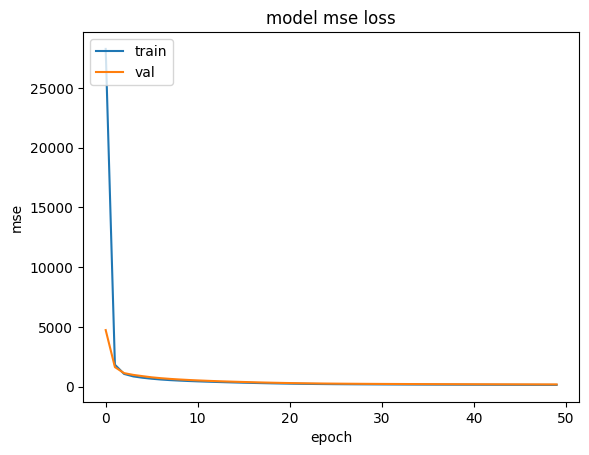

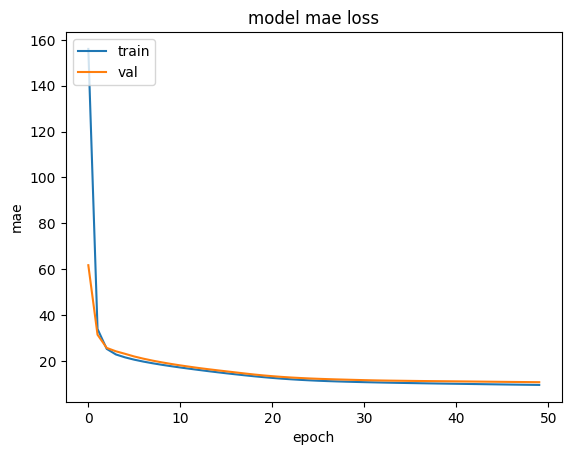

In [513]:
plot_history(hist1)

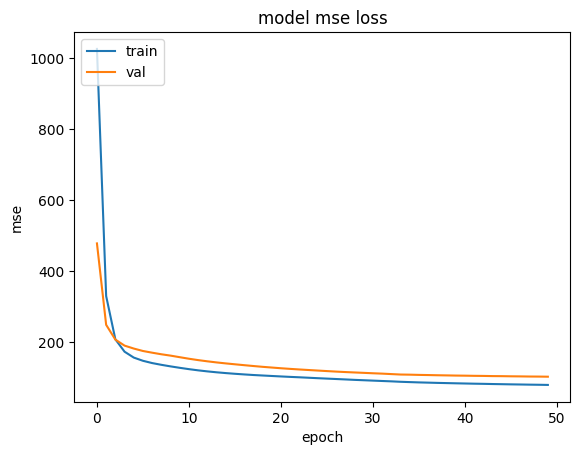

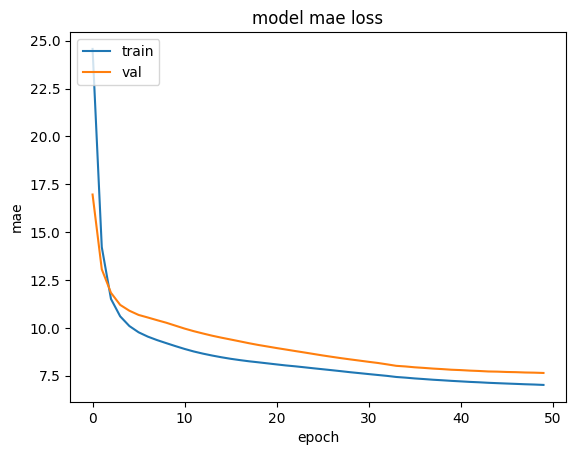

In [514]:
plot_history(hist2)

In [515]:
model1.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 176.7264 - mae: 10.2855 - mse: 176.7264


[184.24888610839844, 184.24888610839844, 10.689740180969238]

In [ ]:
model2.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 102.0819 - mae: 7.5418 - mse: 102.0819


[103.38710021972656, 103.38710021972656, 7.641387939453125]

# <a id='toc3_'></a>[Train with all features](#toc0_)

In [517]:
model3 = Sequential([
    Input(shape = (X_no_drop.shape[1],)),
    Dense(units=16, activation='relu'),
    Dense(units=1)
])
model4 = Sequential([
    Input(shape = (X_no_drop.shape[1],)),
    Dense(units=32, activation='relu'),
    Dense(units=1)
])

In [518]:
model3.compile(optimizer='adam', loss=keras.losses.mse, metrics=['mse','mae'])
hist3 = model3.fit(X_train_no_drop, y_train, epochs=50, batch_size=32, validation_data=(X_test_no_drop, y_test), verbose=2)

Epoch 1/50
26/26 - 1s - 53ms/step - loss: 32736.8281 - mae: 169.5585 - mse: 32736.8281 - val_loss: 17172.8027 - val_mae: 117.2347 - val_mse: 17172.8027
Epoch 2/50
26/26 - 0s - 7ms/step - loss: 10017.3711 - mae: 86.1288 - mse: 10017.3711 - val_loss: 6205.1890 - val_mae: 66.6506 - val_mse: 6205.1890
Epoch 3/50
26/26 - 0s - 13ms/step - loss: 5048.1221 - mae: 59.4366 - mse: 5048.1221 - val_loss: 4742.9038 - val_mae: 56.9878 - val_mse: 4742.9038
Epoch 4/50
26/26 - 0s - 9ms/step - loss: 3839.6731 - mae: 51.9707 - mse: 3839.6731 - val_loss: 3627.2112 - val_mae: 50.3892 - val_mse: 3627.2112
Epoch 5/50
26/26 - 0s - 12ms/step - loss: 3001.0083 - mae: 46.1597 - mse: 3001.0083 - val_loss: 2915.2441 - val_mae: 45.4085 - val_mse: 2915.2441
Epoch 6/50
26/26 - 0s - 11ms/step - loss: 2417.0759 - mae: 41.4364 - mse: 2417.0759 - val_loss: 2399.6802 - val_mae: 41.6571 - val_mse: 2399.6802
Epoch 7/50
26/26 - 0s - 11ms/step - loss: 1974.3790 - mae: 37.3643 - mse: 1974.3790 - val_loss: 1979.6013 - val_mae: 3

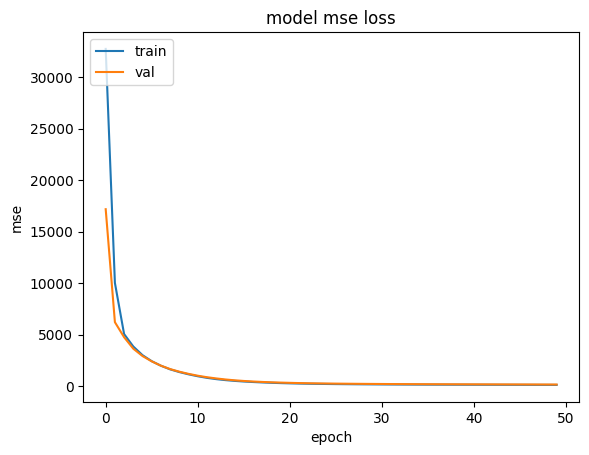

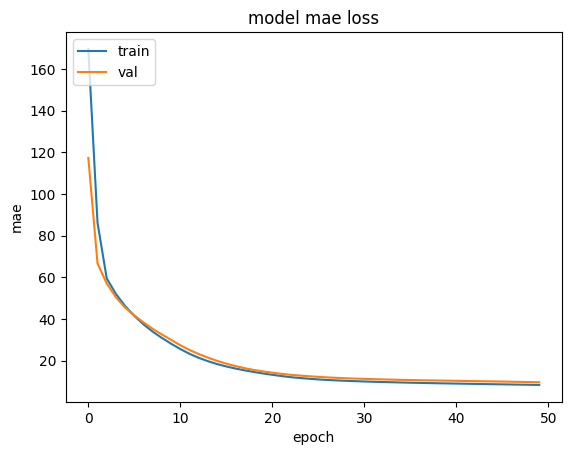

In [519]:
plot_history(hist3)

In [520]:
model4.compile(optimizer='adam', loss=keras.losses.mse, metrics=['mse','mae'])
hist4 = model4.fit(X_train_no_drop, y_train, epochs=50, batch_size=32, validation_data=(X_test_no_drop, y_test), verbose=2)

Epoch 1/50
26/26 - 2s - 71ms/step - loss: 91370.0234 - mae: 294.2773 - mse: 91370.0234 - val_loss: 32319.0488 - val_mae: 178.0170 - val_mse: 32319.0488
Epoch 2/50
26/26 - 0s - 13ms/step - loss: 12246.3242 - mae: 99.0924 - mse: 12246.3242 - val_loss: 1436.0468 - val_mae: 31.5904 - val_mse: 1436.0468
Epoch 3/50
26/26 - 0s - 9ms/step - loss: 739.2487 - mae: 21.6155 - mse: 739.2487 - val_loss: 726.7950 - val_mae: 21.4170 - val_mse: 726.7950
Epoch 4/50
26/26 - 0s - 6ms/step - loss: 569.9016 - mae: 18.4820 - mse: 569.9016 - val_loss: 585.7465 - val_mae: 19.4203 - val_mse: 585.7465
Epoch 5/50
26/26 - 0s - 11ms/step - loss: 503.6023 - mae: 17.7929 - mse: 503.6023 - val_loss: 545.1003 - val_mae: 18.8144 - val_mse: 545.1003
Epoch 6/50
26/26 - 0s - 6ms/step - loss: 464.4982 - mae: 17.0777 - mse: 464.4982 - val_loss: 503.0010 - val_mae: 18.1499 - val_mse: 503.0010
Epoch 7/50
26/26 - 0s - 12ms/step - loss: 428.5592 - mae: 16.4094 - mse: 428.5592 - val_loss: 466.4063 - val_mae: 17.5667 - val_mse: 46

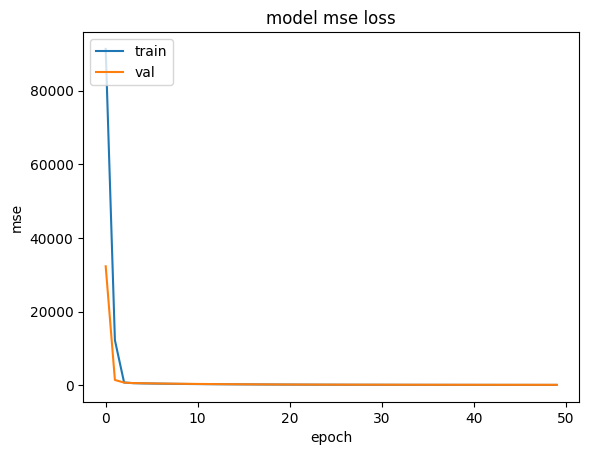

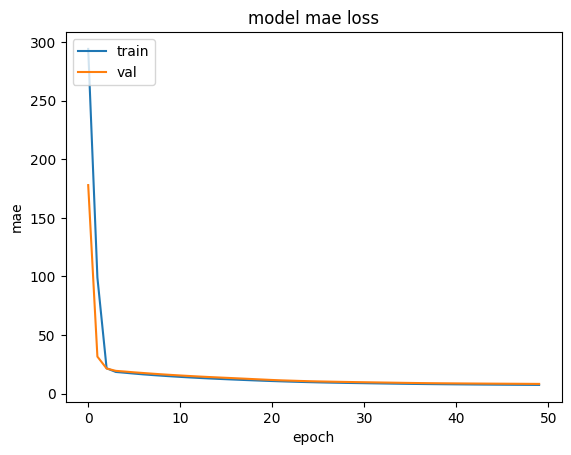

In [521]:
plot_history(hist4)

In [522]:
model3.evaluate(X_test_no_drop, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 135.7808 - mae: 9.2291 - mse: 135.7808 


[149.39707946777344, 149.39707946777344, 9.604386329650879]

In [ ]:
model4.evaluate(X_test_no_drop, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 105.2250 - mae: 8.0460 - mse: 105.2250


[114.64889526367188, 114.64889526367188, 8.275128364562988]

# <a id='toc4_'></a>[Tuning the hyperparameters](#toc0_)

## <a id='toc4_1_'></a>[Number of epochs](#toc0_)

In [545]:
def get_model():
  return Sequential([
      Input(shape = (X.shape[1],)),
      Dense(units=32, activation='relu'),
      Dense(units=1)
  ])

In [546]:
model = get_model()

In [547]:
model.compile(optimizer='adam', loss=keras.losses.mse)
hist1 = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/20
26/26 - 1s - 54ms/step - loss: 301616.5938 - val_loss: 170885.7188
Epoch 2/20
26/26 - 0s - 8ms/step - loss: 94088.9688 - val_loss: 38724.4375
Epoch 3/20
26/26 - 0s - 11ms/step - loss: 15967.4990 - val_loss: 4242.5332
Epoch 4/20
26/26 - 0s - 12ms/step - loss: 2033.8306 - val_loss: 1554.6260
Epoch 5/20
26/26 - 0s - 9ms/step - loss: 1476.0140 - val_loss: 1480.2556
Epoch 6/20
26/26 - 0s - 9ms/step - loss: 1386.5233 - val_loss: 1430.0903
Epoch 7/20
26/26 - 0s - 10ms/step - loss: 1313.9410 - val_loss: 1361.3403
Epoch 8/20
26/26 - 0s - 5ms/step - loss: 1245.2294 - val_loss: 1288.9813
Epoch 9/20
26/26 - 0s - 5ms/step - loss: 1177.4265 - val_loss: 1220.1917
Epoch 10/20
26/26 - 0s - 11ms/step - loss: 1111.4320 - val_loss: 1153.6743
Epoch 11/20
26/26 - 0s - 6ms/step - loss: 1048.1868 - val_loss: 1089.9637
Epoch 12/20
26/26 - 0s - 5ms/step - loss: 988.0022 - val_loss: 1029.1147
Epoch 13/20
26/26 - 0s - 6ms/step - loss: 930.3739 - val_loss: 971.3190
Epoch 14/20
26/26 - 0s - 13ms/step - l

In [548]:
model.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 547.1315 


502.2999572753906

In [549]:
hist2 = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/30
26/26 - 0s - 8ms/step - loss: 410.0060 - val_loss: 444.6616
Epoch 2/30
26/26 - 0s - 9ms/step - loss: 360.2657 - val_loss: 398.6154
Epoch 3/30
26/26 - 0s - 6ms/step - loss: 318.8265 - val_loss: 360.0689
Epoch 4/30
26/26 - 0s - 5ms/step - loss: 285.6150 - val_loss: 329.9400
Epoch 5/30
26/26 - 0s - 7ms/step - loss: 258.7703 - val_loss: 305.9582
Epoch 6/30
26/26 - 0s - 10ms/step - loss: 236.8080 - val_loss: 286.9828
Epoch 7/30
26/26 - 0s - 5ms/step - loss: 219.2701 - val_loss: 272.1533
Epoch 8/30
26/26 - 0s - 5ms/step - loss: 205.7308 - val_loss: 260.2953
Epoch 9/30
26/26 - 0s - 14ms/step - loss: 194.7187 - val_loss: 250.9592
Epoch 10/30
26/26 - 0s - 9ms/step - loss: 185.7001 - val_loss: 243.3090
Epoch 11/30
26/26 - 0s - 5ms/step - loss: 178.3296 - val_loss: 236.8597
Epoch 12/30
26/26 - 0s - 6ms/step - loss: 172.2626 - val_loss: 231.2592
Epoch 13/30
26/26 - 0s - 5ms/step - loss: 167.2288 - val_loss: 226.3984
Epoch 14/30
26/26 - 0s - 12ms/step - loss: 162.8648 - val_loss: 222.005

In [550]:
model.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 171.0611 


176.07669067382812

In [551]:
hist3 = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/50
26/26 - 0s - 7ms/step - loss: 125.9121 - val_loss: 173.9395
Epoch 2/50
26/26 - 0s - 12ms/step - loss: 124.5183 - val_loss: 171.9614
Epoch 3/50
26/26 - 0s - 5ms/step - loss: 123.2331 - val_loss: 170.1493
Epoch 4/50
26/26 - 0s - 6ms/step - loss: 122.0054 - val_loss: 168.3817
Epoch 5/50
26/26 - 0s - 11ms/step - loss: 120.8148 - val_loss: 166.6514
Epoch 6/50
26/26 - 0s - 8ms/step - loss: 119.6698 - val_loss: 165.0069
Epoch 7/50
26/26 - 0s - 11ms/step - loss: 118.5582 - val_loss: 163.4244
Epoch 8/50
26/26 - 0s - 12ms/step - loss: 117.4809 - val_loss: 161.9002
Epoch 9/50
26/26 - 0s - 11ms/step - loss: 116.4454 - val_loss: 160.4285
Epoch 10/50
26/26 - 0s - 13ms/step - loss: 115.4484 - val_loss: 159.0824
Epoch 11/50
26/26 - 0s - 11ms/step - loss: 114.5065 - val_loss: 157.8266
Epoch 12/50
26/26 - 0s - 12ms/step - loss: 113.5933 - val_loss: 156.6135
Epoch 13/50
26/26 - 0s - 12ms/step - loss: 112.7326 - val_loss: 155.4544
Epoch 14/50
26/26 - 0s - 8ms/step - loss: 111.9135 - val_loss: 1

In [552]:
model.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 123.2967 


127.23625183105469

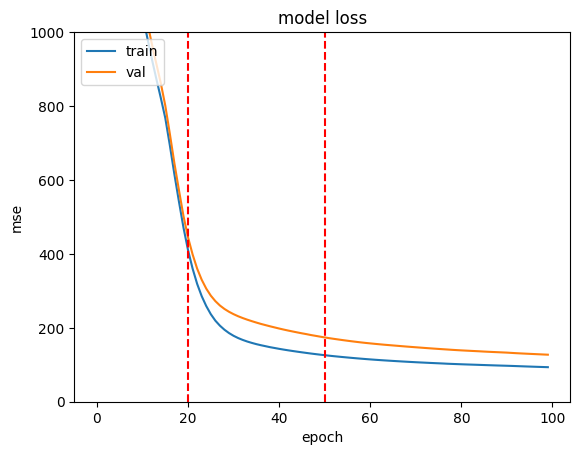

In [ ]:
hist = dict()
hist['loss'] = hist1.history['loss'] + hist2.history['loss']+hist3.history['loss']
hist['val_loss'] = hist1.history['val_loss'] + hist2.history['val_loss']+hist3.history['val_loss']
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title('model loss')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.axvline(x=20,color='r',linestyle='--')
plt.axvline(x=50,color='r',linestyle='--')
plt.ylim([0,1e3])
plt.show()

## <a id='toc4_2_'></a>[Loss function](#toc0_)

In [566]:
model = get_model()
model.compile(optimizer='adam', loss=keras.losses.mse,metrics=['mse','mae',keras.losses.Huber()])
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/100
26/26 - 2s - 63ms/step - huber_loss: 170.1179 - loss: 34771.9961 - mae: 174.0266 - mse: 34771.9961 - val_huber_loss: 66.7169 - val_loss: 5188.3237 - val_mae: 66.3449 - val_mse: 5188.3237
Epoch 2/100
26/26 - 0s - 13ms/step - huber_loss: 30.9522 - loss: 1584.9905 - mae: 31.4772 - mse: 1584.9905 - val_huber_loss: 24.8280 - val_loss: 1036.2692 - val_mae: 25.0371 - val_mse: 1036.2692
Epoch 3/100
26/26 - 0s - 12ms/step - huber_loss: 21.4260 - loss: 774.5591 - mae: 21.8433 - mse: 774.5591 - val_huber_loss: 21.5540 - val_loss: 766.4091 - val_mae: 21.4727 - val_mse: 766.4091
Epoch 4/100
26/26 - 0s - 8ms/step - huber_loss: 19.1081 - loss: 606.7063 - mae: 19.5810 - mse: 606.7063 - val_huber_loss: 20.5831 - val_loss: 682.5301 - val_mae: 20.3570 - val_mse: 682.5301
Epoch 5/100
26/26 - 0s - 6ms/step - huber_loss: 18.2346 - loss: 553.7083 - mae: 18.6816 - mse: 553.7083 - val_huber_loss: 19.6792 - val_loss: 638.7353 - val_mae: 19.5447 - val_mse: 638.7353
Epoch 6/100
26/26 - 0s - 6ms/step -

In [567]:
model.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - huber_loss: 7.2999 - loss: 94.3820 - mae: 7.7803 - mse: 94.3820 


[103.77765655517578, 103.77765655517578, 8.133920669555664, 7.67379093170166]

In [568]:
model = get_model()
model.compile(optimizer='adam', loss=keras.losses.mae,metrics=['mse','mae',keras.losses.Huber()])
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/100
26/26 - 2s - 60ms/step - huber_loss: 123.3279 - loss: 126.2951 - mae: 126.2951 - mse: 23869.0703 - val_huber_loss: 55.6336 - val_loss: 57.5565 - val_mae: 57.5565 - val_mse: 5442.7300
Epoch 2/100
26/26 - 0s - 14ms/step - huber_loss: 49.0048 - loss: 49.7281 - mae: 49.7281 - mse: 4334.8394 - val_huber_loss: 42.0977 - val_loss: 43.7994 - val_mae: 43.7994 - val_mse: 2961.5532
Epoch 3/100
26/26 - 0s - 6ms/step - huber_loss: 38.0577 - loss: 39.0204 - mae: 39.0204 - mse: 2544.9128 - val_huber_loss: 32.2691 - val_loss: 33.4603 - val_mae: 33.4603 - val_mse: 1828.0031
Epoch 4/100
26/26 - 0s - 7ms/step - huber_loss: 28.4901 - loss: 29.3062 - mae: 29.3062 - mse: 1489.0825 - val_huber_loss: 26.4974 - val_loss: 27.1048 - val_mae: 27.1048 - val_mse: 1195.5280
Epoch 5/100
26/26 - 0s - 6ms/step - huber_loss: 22.1934 - loss: 22.9721 - mae: 22.9721 - mse: 898.7350 - val_huber_loss: 21.9780 - val_loss: 22.3189 - val_mae: 22.3189 - val_mse: 799.4671
Epoch 6/100
26/26 - 0s - 6ms/step - huber_loss

In [569]:
model.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - huber_loss: 9.0580 - loss: 9.5310 - mae: 9.5310 - mse: 151.5988 


[9.540090560913086, 155.53573608398438, 9.540090560913086, 9.122987747192383]

In [570]:
model = get_model()
model.compile(optimizer='adam', loss=keras.losses.huber,metrics=['mse','mae',keras.losses.Huber()])
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/100
26/26 - 2s - 91ms/step - huber_loss: 30.5553 - loss: 30.8831 - mae: 31.3794 - mse: 1543.4164 - val_huber_loss: 21.9344 - val_loss: 21.9603 - val_mae: 22.4571 - val_mse: 771.7554
Epoch 2/100
26/26 - 0s - 6ms/step - huber_loss: 18.5482 - loss: 18.6248 - mae: 19.1206 - mse: 582.8201 - val_huber_loss: 17.1924 - val_loss: 16.9597 - val_mae: 17.4526 - val_mse: 479.8700
Epoch 3/100
26/26 - 0s - 12ms/step - huber_loss: 13.7124 - loss: 13.8044 - mae: 14.2952 - mse: 323.5984 - val_huber_loss: 13.9275 - val_loss: 13.6332 - val_mae: 14.1233 - val_mse: 315.8032
Epoch 4/100
26/26 - 0s - 7ms/step - huber_loss: 11.1329 - loss: 11.2711 - mae: 11.7601 - mse: 216.3579 - val_huber_loss: 12.2339 - val_loss: 12.0322 - val_mae: 12.5208 - val_mse: 246.3706
Epoch 5/100
26/26 - 0s - 7ms/step - huber_loss: 10.3965 - loss: 10.5074 - mae: 10.9999 - mse: 191.4180 - val_huber_loss: 11.7474 - val_loss: 11.6236 - val_mae: 12.1157 - val_mse: 234.9022
Epoch 6/100
26/26 - 0s - 7ms/step - huber_loss: 10.5980 -

In [ ]:
model.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - huber_loss: 6.5812 - loss: 6.6242 - mae: 7.1066 - mse: 92.4613 


[6.553022384643555, 92.13170623779297, 7.037007808685303, 6.381000518798828]

## <a id='toc5_'></a>[Optimizer](#toc0_)

In [631]:
def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.ylim([0,50])
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [632]:
model = get_model()
model.compile(optimizer=keras.optimizers.SGD(), loss=keras.losses.Huber())
hist = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/100
26/26 - 1s - 21ms/step - loss: 2312.6377 - val_loss: 35.2440
Epoch 2/100
26/26 - 0s - 6ms/step - loss: 34.2064 - val_loss: 34.9840
Epoch 3/100
26/26 - 0s - 12ms/step - loss: 33.9463 - val_loss: 34.7240
Epoch 4/100
26/26 - 0s - 6ms/step - loss: 33.6863 - val_loss: 34.4640
Epoch 5/100
26/26 - 0s - 5ms/step - loss: 33.4263 - val_loss: 34.2040
Epoch 6/100
26/26 - 0s - 6ms/step - loss: 33.1663 - val_loss: 33.9441
Epoch 7/100
26/26 - 0s - 5ms/step - loss: 32.9063 - val_loss: 33.6845
Epoch 8/100
26/26 - 0s - 5ms/step - loss: 32.6463 - val_loss: 33.4253
Epoch 9/100
26/26 - 0s - 6ms/step - loss: 32.3862 - val_loss: 33.1664
Epoch 10/100
26/26 - 0s - 11ms/step - loss: 32.3492 - val_loss: 32.9277
Epoch 11/100
26/26 - 0s - 8ms/step - loss: 31.8864 - val_loss: 32.6696
Epoch 12/100
26/26 - 0s - 8ms/step - loss: 31.6267 - val_loss: 32.4118
Epoch 13/100
26/26 - 0s - 8ms/step - loss: 31.3672 - val_loss: 32.1545
Epoch 14/100
26/26 - 0s - 12ms/step - loss: 31.1078 - val_loss: 31.8974
Epoch 15/

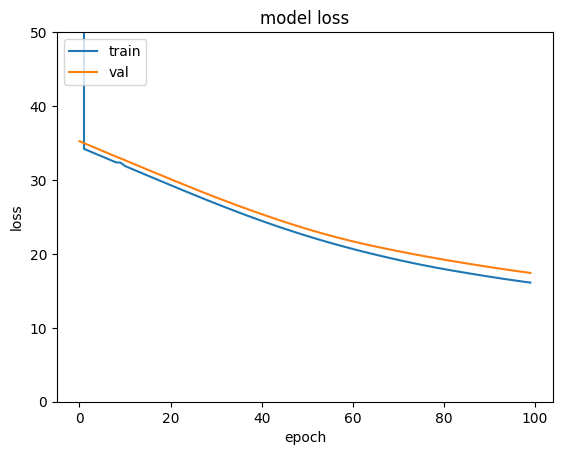

In [633]:
plot_loss(hist)

In [634]:
model.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17.3875 


17.42364501953125

In [635]:
model = get_model()
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.Huber())
hist = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/100
26/26 - 1s - 44ms/step - loss: 120.8203 - val_loss: 47.9381
Epoch 2/100
26/26 - 0s - 6ms/step - loss: 47.2784 - val_loss: 40.6318
Epoch 3/100
26/26 - 0s - 7ms/step - loss: 38.9561 - val_loss: 35.3051
Epoch 4/100
26/26 - 0s - 6ms/step - loss: 33.0357 - val_loss: 29.9696
Epoch 5/100
26/26 - 0s - 5ms/step - loss: 27.9327 - val_loss: 25.8654
Epoch 6/100
26/26 - 0s - 7ms/step - loss: 23.9816 - val_loss: 22.6132
Epoch 7/100
26/26 - 0s - 10ms/step - loss: 20.7125 - val_loss: 19.4968
Epoch 8/100
26/26 - 0s - 6ms/step - loss: 17.7021 - val_loss: 16.8504
Epoch 9/100
26/26 - 0s - 11ms/step - loss: 15.3525 - val_loss: 14.7793
Epoch 10/100
26/26 - 0s - 5ms/step - loss: 13.3239 - val_loss: 13.1332
Epoch 11/100
26/26 - 0s - 6ms/step - loss: 11.8807 - val_loss: 11.8161
Epoch 12/100
26/26 - 0s - 6ms/step - loss: 10.7103 - val_loss: 11.0130
Epoch 13/100
26/26 - 0s - 5ms/step - loss: 9.9325 - val_loss: 10.8225
Epoch 14/100
26/26 - 0s - 5ms/step - loss: 9.7793 - val_loss: 10.0946
Epoch 15/100


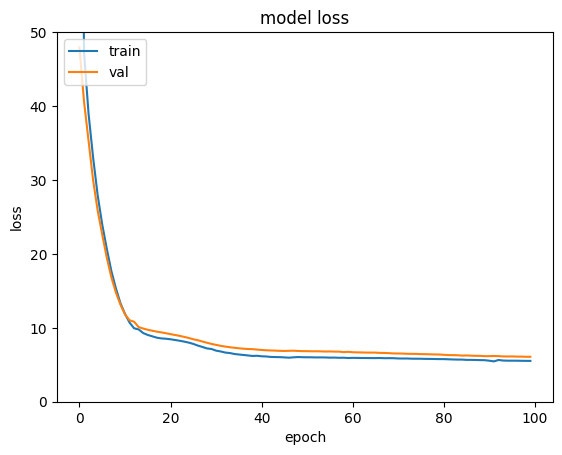

In [636]:
plot_loss(hist)

In [637]:
model.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.9162 


6.080770492553711

In [638]:
model = get_model()
model.compile(optimizer=keras.optimizers.RMSprop(), loss=keras.losses.Huber())
hist = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/100
26/26 - 1s - 38ms/step - loss: 37.9492 - val_loss: 13.8748
Epoch 2/100
26/26 - 0s - 7ms/step - loss: 12.7703 - val_loss: 13.2012
Epoch 3/100
26/26 - 0s - 11ms/step - loss: 11.7606 - val_loss: 19.9106
Epoch 4/100
26/26 - 0s - 12ms/step - loss: 11.4320 - val_loss: 11.2440
Epoch 5/100
26/26 - 0s - 5ms/step - loss: 11.1310 - val_loss: 13.8429
Epoch 6/100
26/26 - 0s - 6ms/step - loss: 10.6750 - val_loss: 20.2432
Epoch 7/100
26/26 - 0s - 12ms/step - loss: 10.3757 - val_loss: 19.4993
Epoch 8/100
26/26 - 0s - 6ms/step - loss: 10.1997 - val_loss: 11.8725
Epoch 9/100
26/26 - 0s - 12ms/step - loss: 10.0915 - val_loss: 10.1301
Epoch 10/100
26/26 - 0s - 6ms/step - loss: 10.0883 - val_loss: 12.4694
Epoch 11/100
26/26 - 0s - 12ms/step - loss: 9.9769 - val_loss: 10.0079
Epoch 12/100
26/26 - 0s - 11ms/step - loss: 9.7744 - val_loss: 10.0585
Epoch 13/100
26/26 - 0s - 12ms/step - loss: 9.6060 - val_loss: 12.0401
Epoch 14/100
26/26 - 0s - 5ms/step - loss: 9.6774 - val_loss: 9.4614
Epoch 15/100

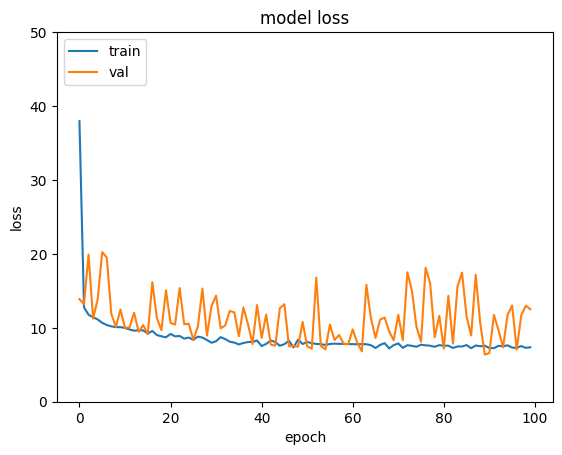

In [639]:
plot_loss(hist)

In [640]:
model.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.9425 


12.513409614562988